In [1]:
import predictions
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
# Reading the data from the Pre-processed file
data = pd.read_csv('cleaned_data.csv')
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,2,9,5,2,0,0,0,40,4,0


In [3]:

X = data.drop(columns=['income'])
y = data['income']

# Convert categorical variables into numerical representation (One-Hot Encoding)
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)


Accuracy: 0.7920309905921417
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      6830
           1       0.66      0.31      0.42      2205

    accuracy                           0.79      9035
   macro avg       0.73      0.63      0.65      9035
weighted avg       0.77      0.79      0.76      9035


In [4]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
best_predictions = best_model.predict(X_test)

# Calculate accuracy using the best model
best_accuracy = accuracy_score(y_test, best_predictions)
print("Best Model Accuracy:", best_accuracy)


Best Parameters: {'var_smoothing': 1e-05}
Best Model Accuracy: 0.7997786386275595


Confusion Matrix:
[[6477  353]
 [1526  679]]


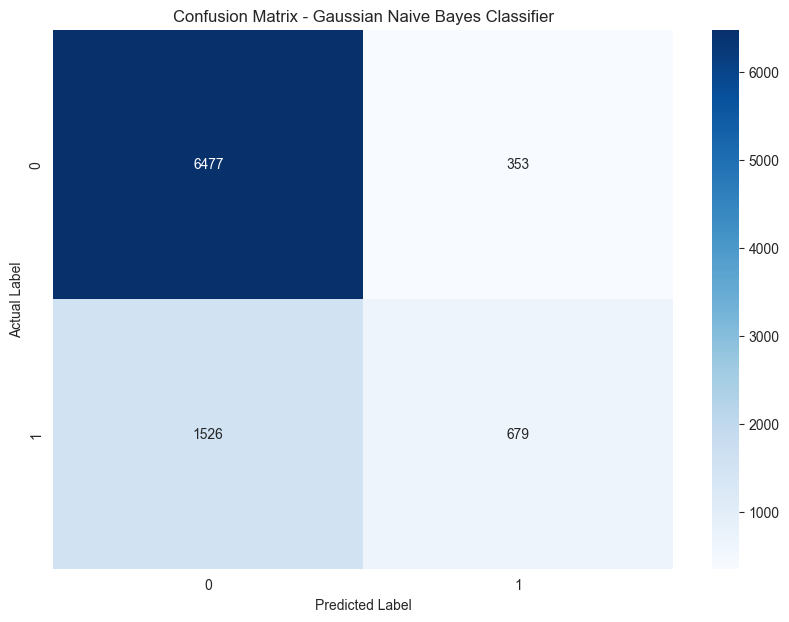

In [5]:
from sklearn.metrics import confusion_matrix

# Construct confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gaussian Naive Bayes Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
